<img src = "https://www.hh.se/images/18.4ad3d9ee1656d0f05ef643a3/1550842090193/hh-logo.svg" width = "150" align = "left">  
<br/>
<br/>
    
# Python, a Gateway to Machine Learning

<!--
<center> <img src = "https://www.link.cs.cmu.edu/splay/tree5.jpg" width = "200"></center>
<center><i>A Self-Adjusting Search Tree</i></center>
<center><i>by Jorge Stolfi</i></center>
<br>
-->

## Project: Asking questions to data using Pandas and NumPy

### Introduction

This is a Juypyter notebook that contains text and links for the last assignment of the course. The assignmement is designed as a project: an open ended task that allows you to apply what you learned about Python including Pandas and NumPy to ask questions and find answers to questions of social relevance. 

The topics you can choose are
*  climate change and its consequences,
* health care and its consequences or
* education and its consequences


On completion of your project this notebook should include the following parts:

* An introduction to what it is that you want to explore. 

* A description of the data sets that you use, including the sources and what kind of data they include.

* A section for loading the data (possibly from several data sets) including  code to explore and possibly clean or reorganize the data so that you can use it for the rest of the problem.
      
* A section that asks one or more questions that can be answered by exploring, combining, transforming the data.

      
* A section with programs for the questions.


* A section with an analysis of the results of your programs to explain the answers to your questions.

In each part there can be several cells, both code and markdown. But each section has to start with a markdown cell including at least the title of the section: you will find these cells with a little explanation alredy in the notebook.



This project is part of the examination of the course. There are instructions on how to submit, including deadlines and advice, in the Blackboard site for the course. Please follow these instructions. There you can also see what is needed in order to pass. 



# Correlation between funding of climate change prevention in industries and emission of greenhouse gases along with energy gereration and electricity prices

In this project I try to find any correlation between the money that the industry spends to prevent air pollution and the measurable change in greenhouse gases in the atmosphere. I also try to find if this has any impact on electricity prices for private citizens.

The hypothesis is that a focus on lower emissions will result in more energy ineffective industry processes and less available power leading to higher prices on the grid. 

This is a limited study as only a few sources are taken into account with data only from the year 2001 and onwards so any conclusions should be drawn with the bigger picture in mind.


## Data sources


Data has been collected from Statistiska Centralbyrån(SCB) and Energimarknadsinspektionen. SCB has an online database where data from all kinds of institutions can be found, it has an api for data collection and it is possible to download data into a wide range of formats including .csv and .xlsx. There were no data on electricity prices in the SCB database however, so that data was instead gathered from Energimarknadsinspektionen.

Greenhouse emissions - https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__MI__MI0107/TotaltUtslappN/
Industry costs - https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__MI__MI1302__MI1302B/MiljoKostInvSNI2007/
Energy generation - https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__EN__EN0105__EN0105A/ElProdAr/
Electricity prices - https://www.ei.se/om-oss/statistik-och-oppna-data/historiska-jamforpriser-pa-avtal---elhandel


## Data extraction


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def show_full_dataframe(df):
    with pd.option_context('display.max_rows', None,
                           'display.max_columns', None,
                           'display.precision', 3,
                           ):
        display(df)

In [178]:

industry_costs = pd.read_csv("industrikostnader.csv", encoding = 'ISO-8859-1', header=1, index_col=[0,1]).replace('..',None)
#multiindex makes it difficult to plot and only one index is interesting so the dataframe is reduced to one level of indexing
industry_costs = industry_costs.loc['totala miljöskyddskostnader']

#I encountered an error when reading these files saying that utf-8 could not handle the charachter ö,
#so I changed the encoding from the standard utf-8 to ISO-8859-1 to handle western european languages like Swedish
greenhouse_emissions = pd.read_csv("utslapp av vaxthusgas.csv", encoding = 'ISO-8859-1', header = 1, index_col=[0,1])
greenhouse_emissions = greenhouse_emissions.loc['Totala Växthusgaser (kt CO2-ekv.)','2001':'2020']

energy_generation = pd.read_csv("nettotillforsel av el.csv", encoding = 'ISO-8859-1', header = 1, index_col=0)

electricity_price = pd.read_excel("Statistik-elhandelspriser-2008-2019.xlsx", 
                                  sheet_name=1, header=9, index_col=[21,22])

#electricity_price needs to be cleaned up

electricity_price =electricity_price.loc[:,'Fast pris 1 år.3':]
electricity_price = electricity_price.groupby(level=0).mean()
#the last two years have asterisks that makes it impossible to convert them to float
electricity_price = electricity_price.rename(index={'2018*':'2018', '2019*':'2019'})
show_full_dataframe(electricity_price)

,Fast pris 1 år.3,Fast pris 3 år.3,Rörligt pris.3,Anvisat pris.3
2008,115.727,115.326,108.414,120.963
2009,100.347,101.940,97.167,119.474
2010,107.859,105.036,116.067,126.883
2011,112.203,110.109,102.788,136.398
2012,99.724,102.875,85.121,129.780
2013,95.130,94.884,90.331,122.926
2014,89.786,91.003,83.237,116.316
2015,84.696,86.829,74.864,108.917
2016,82.759,81.770,83.834,104.622
2017,88.011,86.286,85.381,108.543


## Programs
 

C:\Users\Timmy\AppData\Local\Temp\ipykernel_10568\2756412820.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(industry_costs.columns, fontsize=8, rotation=45)
C:\Users\Timmy\AppData\Local\Temp\ipykernel_10568\2756412820.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(greenhouse_emissions.columns, fontsize=8, rotation=45)
C:\Users\Timmy\AppData\Local\Temp\ipykernel_10568\2756412820.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(greenhouse_emissions.columns, fontsize=8, rotation=45)


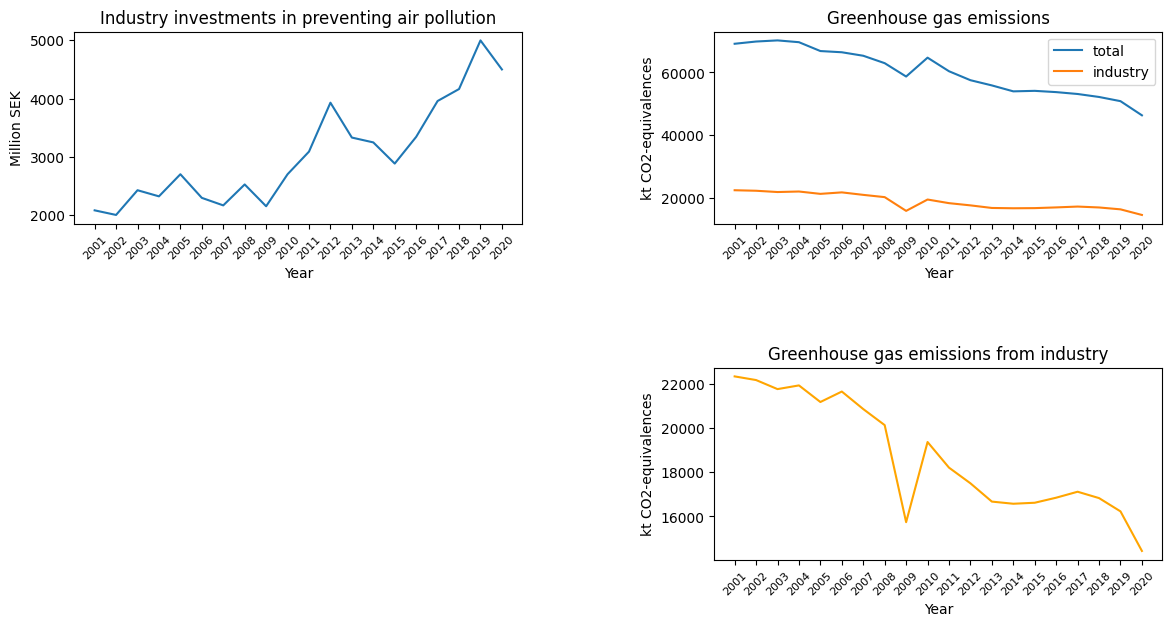

C:\Users\Timmy\AppData\Local\Temp\ipykernel_10568\2756412820.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(energy_generation.columns, fontsize=8, rotation=45)


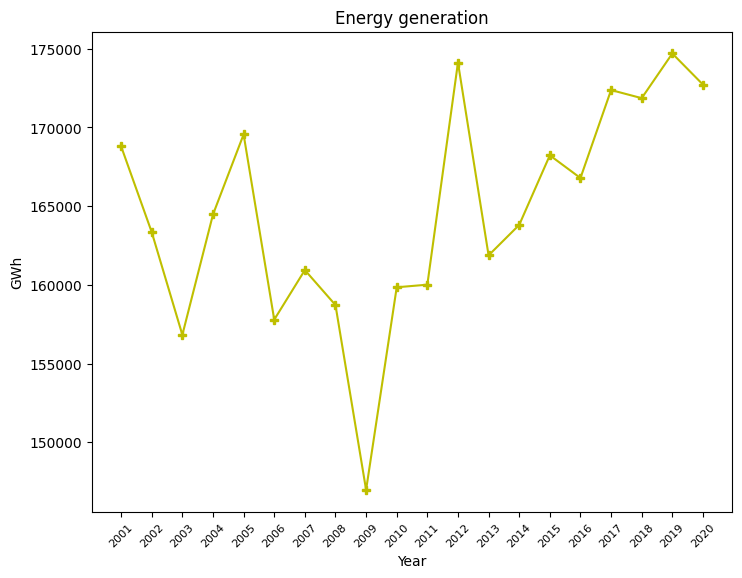

C:\Users\Timmy\AppData\Local\Temp\ipykernel_10568\2756412820.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(electricity_price.index, fontsize=8, rotation=45)


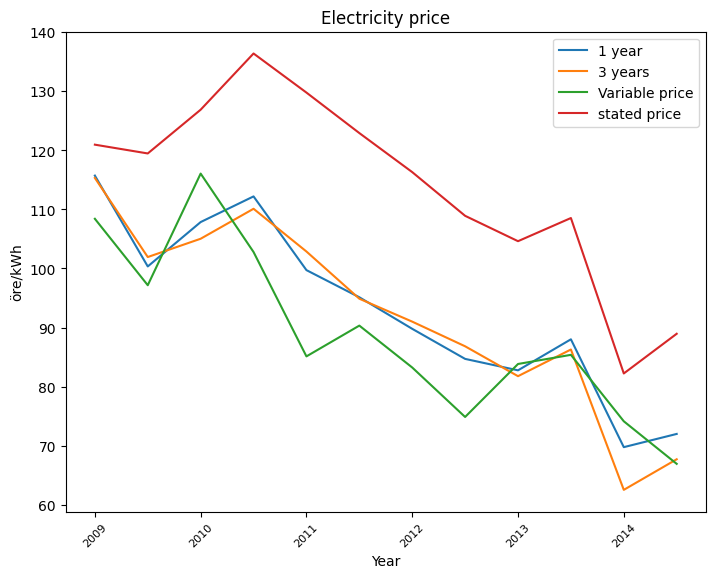

In [221]:

fig = plt.figure()
ax1 = fig.add_axes([0,0.7,0.7,0.4])
ax1.set_xlabel('Year')
ax1.set_ylabel('Million SEK')
ax1.set_title('Industry investments in preventing air pollution')

ax1.plot(industry_costs.columns, industry_costs.loc['luft'].astype(int))
ax1.set_xticklabels(industry_costs.columns, fontsize=8, rotation=45)

ax2 = fig.add_axes([1,0.7,0.7,0.4])
ax2.set_xlabel('Year')
ax2.set_ylabel('kt CO2-equivalences')
ax2.set_title('Greenhouse gas emissions')
ax2.set_xticklabels(greenhouse_emissions.columns, fontsize=8, rotation=45)

line1, = ax2.plot(greenhouse_emissions.columns, greenhouse_emissions.loc['NATIONELL TOTAL (exklusive LULUCF, exklusive internationella transporter)']
        .astype(float), label='total')
line2, = ax2.plot(greenhouse_emissions.columns, greenhouse_emissions.loc['INDUSTRI, TOTALT']
        .astype(float), label='industry')
ax2.legend(handles = [line1,line2])

ax3 = fig.add_axes([1,0,0.7,0.4])
ax3.set_xlabel('Year')
ax3.set_ylabel('kt CO2-equivalences')
ax3.set_title('Greenhouse gas emissions from industry')
ax3.set_xticklabels(greenhouse_emissions.columns, fontsize=8, rotation=45)
ax3.plot(greenhouse_emissions.columns, greenhouse_emissions.loc['INDUSTRI, TOTALT']
        .astype(float), color='orange')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0.7,1,1])
ax.set_xlabel('Year')
ax.set_ylabel('GWh')
ax.set_title('Energy generation')
ax.set_xticklabels(energy_generation.columns, fontsize=8, rotation=45)
line1, = ax.plot(energy_generation.columns, energy_generation.loc['total tillförsel av el'].astype(int), 'P-y', label='generation')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0.7,1,1])
ax.set_xlabel('Year')
ax.set_ylabel('öre/kWh')
ax.set_title('Electricity price')
ax.set_xticklabels(electricity_price.index, fontsize=8, rotation=45)
line1, = ax.plot(electricity_price.index, electricity_price['Fast pris 1 år.3'], label='1 year')
line2, = ax.plot(electricity_price.index, electricity_price['Fast pris 3 år.3'], label='3 years')
line3, = ax.plot(electricity_price.index, electricity_price['Rörligt pris.3'], label='Variable price')
line4, = ax.plot(electricity_price.index, electricity_price['Anvisat pris.3'], label='stated price')
ax.legend(handles = [line1,line2,line3,line4])
plt.show()

## Results and analysis

From the extracted data a conclusion that contradicts the hypothesis can be reached. While investments in preventing air pollution seems to have an effect in reducing the ammount of greenhouse gases in the atmosphere this does not result in an increase in energy prices, in fact prices have steadily dropped up to the year 2019. This could be the result of investments in green energy that are paying of, adding more capacity to the grid and allowing for a greener industry.

To expand this study, more sources of enviromental investments and energy production could be investigated to see if specific areas have had more effect than others. An investigation into what it acually means to prevent air pollution in the industry and what measures are taken should be made. Investments in the energy sector should also be looked at to find out where investments are being made and where power comes from.